**Project Objective: To detect whether mouse movement patterns are from a human or a bot**

**Library Imports and Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

**Simulating Mouse Paths (Data Simulation)**

In [5]:
def generate_mouse_path(kind='human', length=100):
    x,y=[0],[0]
    for _ in range(length):
        if kind == 'human':
            dx=np.random.normal(loc=1, scale=1)
            dy=np.random.normal(loc=1, scale=1)
        elif kind == 'bot':
            dx=1
            dy=0
        x.append(x[-1] + dx)
        y.append(y[-1]+ dy)
    return x,y

**Feature Engineering**

In [3]:
def extract_features(x,y):
    x=np.array(x)
    y=np.array(y)
    dx=np.diff(x)
    dy=np.diff(y)
    speed=np.sqrt(dx**2+dy**2)
    angle_changes=np.diff(np.arctan2(dy, dx))
    curvature=np.sum(np.abs(angle_changes))
    return {
        'total_distance': np.sum(speed),
        'avg_speed': np.mean(speed),
        'speed_std': np.std(speed),
        'curvature': curvature,
        'straightness': np.sqrt((x[-1]-x[0])**2 + (y[-1]-y[0])**2)/np.sum(speed)
    }

**Main Pipeline**

Generate Dataset

[[153   0]
 [  0 147]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       147

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

ROC AUC: 1.0


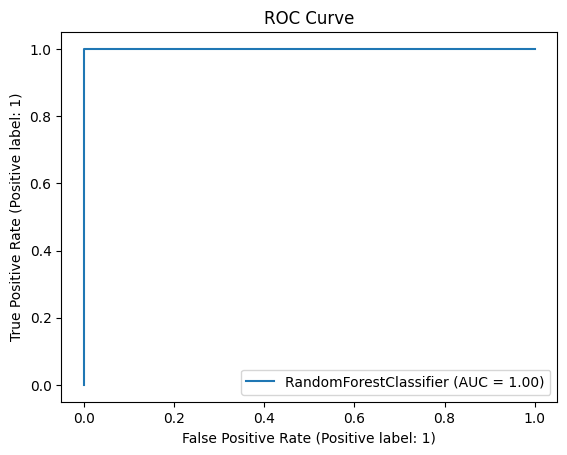

In [10]:
human_features, bot_features =[],[]
for _ in range(500):
    x,y = generate_mouse_path('human')
    feats=extract_features(x,y)
    feats['label']=1
    human_features.append(feats)

    x,y=generate_mouse_path('bot')
    feats=extract_features(x,y)
    feats['label']=0
    bot_features.append(feats)
                       
features_df = pd.DataFrame(human_features + bot_features)
X=features_df.drop('label', axis=1)
y=features_df['label']
    
# Train-Test Split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=10)

# Train Model
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve")
plt.show()

Visualize Example Paths

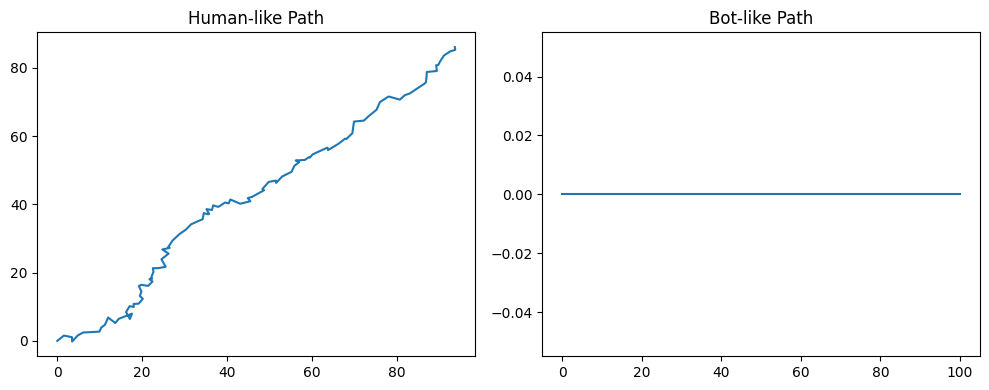

In [13]:
fig, ax =plt.subplots(1,2, figsize=(10,4))
x,y=generate_mouse_path('human')
ax[0].plot(x,y)
ax[0].set_title("Human-like Path")
x,y=generate_mouse_path('bot')
ax[1].plot(x,y)
ax[1].set_title("Bot-like Path")
plt.tight_layout()
plt.show()